In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import missingno
import pandas_profiling as pp

from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.metrics import accuracy

Using TensorFlow backend.


# Load the Data

In [2]:
# Read and view train file
df_train = pd.read_csv("X_train.csv")
print('df_train shape = ' + str(df_train.shape)) # 487680/128 = 3810 rows
df_train.head()

df_train shape = (487680, 13)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


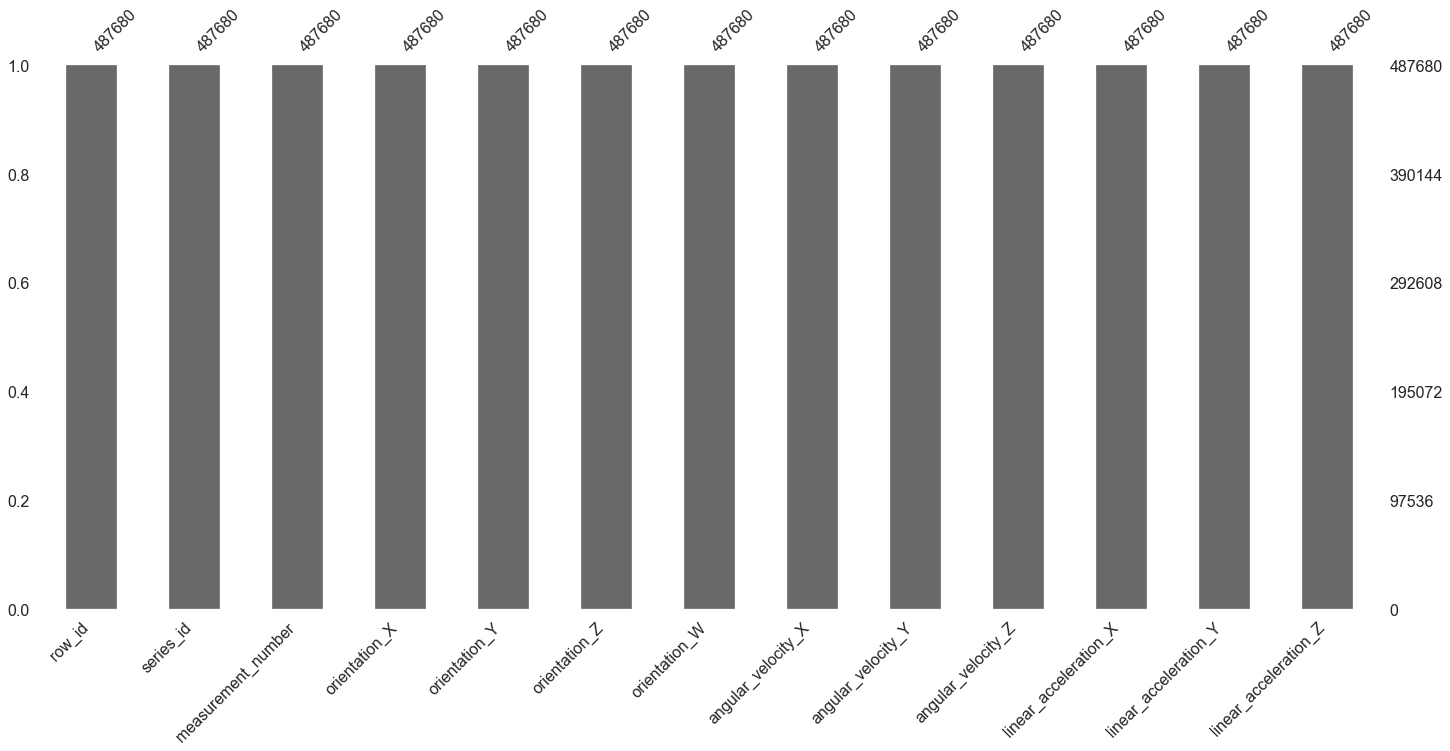

In [3]:
missingno.bar(df_train)

In [4]:
# Read and view test file
df_test = pd.read_csv("X_test.csv")
print('df_test shape = ' + str(df_test.shape)) # 488448/128 = 3816 rows
df_test.head()

df_test shape = (488448, 13)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [5]:
df_train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


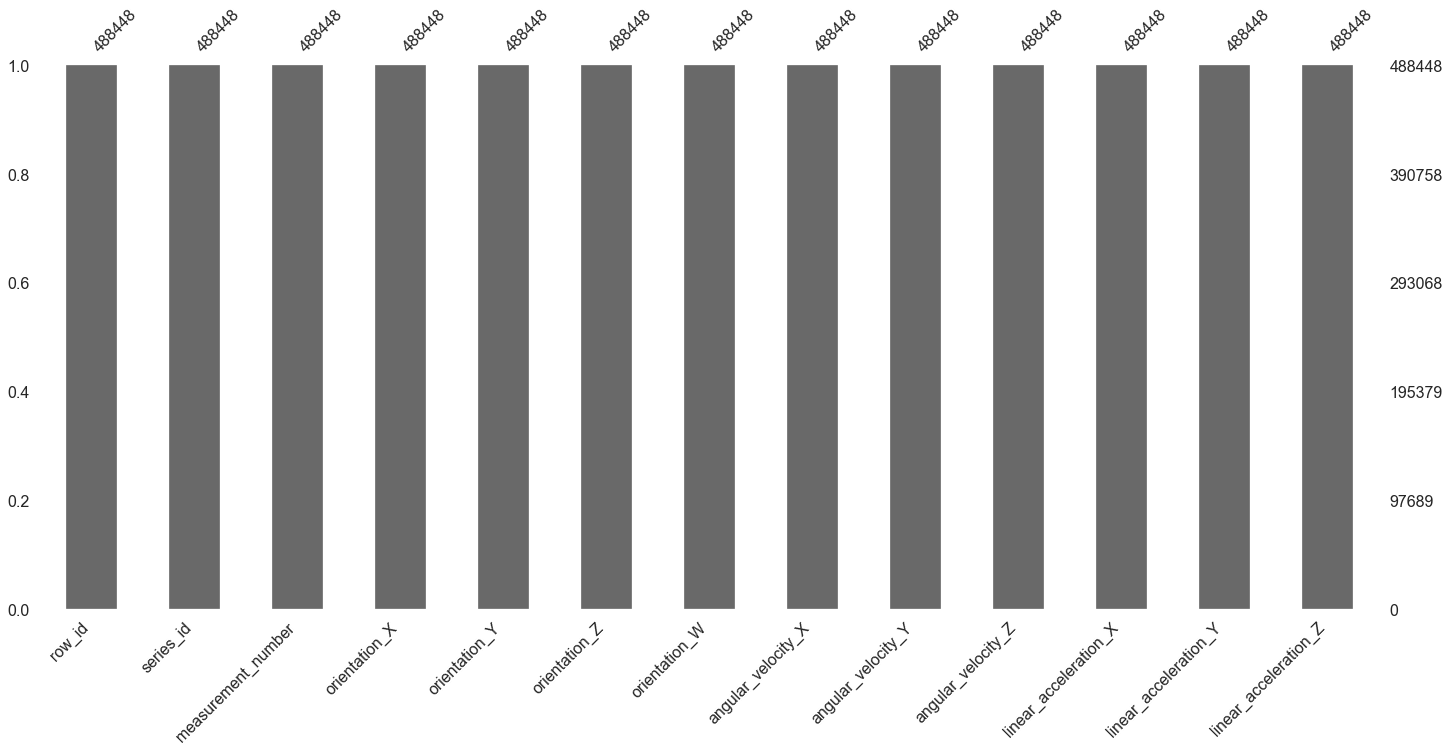

In [6]:
missingno.bar(df_test)

In [7]:
# Check if the 'series_id' column is ordered(ascending)
df_train["series_id"].is_monotonic

True

In [8]:
# Quickly verifying the fact that we have 128 measurements per series_id.
df_train.groupby("series_id").count().head(10)

,row_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
series_id,,,,,,,,,,,,
0,128,128,128,128,128,128,128,128,128,128,128,128
1,128,128,128,128,128,128,128,128,128,128,128,128
2,128,128,128,128,128,128,128,128,128,128,128,128
3,128,128,128,128,128,128,128,128,128,128,128,128
4,128,128,128,128,128,128,128,128,128,128,128,128
5,128,128,128,128,128,128,128,128,128,128,128,128
6,128,128,128,128,128,128,128,128,128,128,128,128
7,128,128,128,128,128,128,128,128,128,128,128,128
8,128,128,128,128,128,128,128,128,128,128,128,128


In [9]:
# Read and view targets for the training set
df_y = pd.read_csv("y_train.csv")
print('df_y shape = ' + str(df_y.shape))
df_y.head()

df_y shape = (3810, 3)


,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


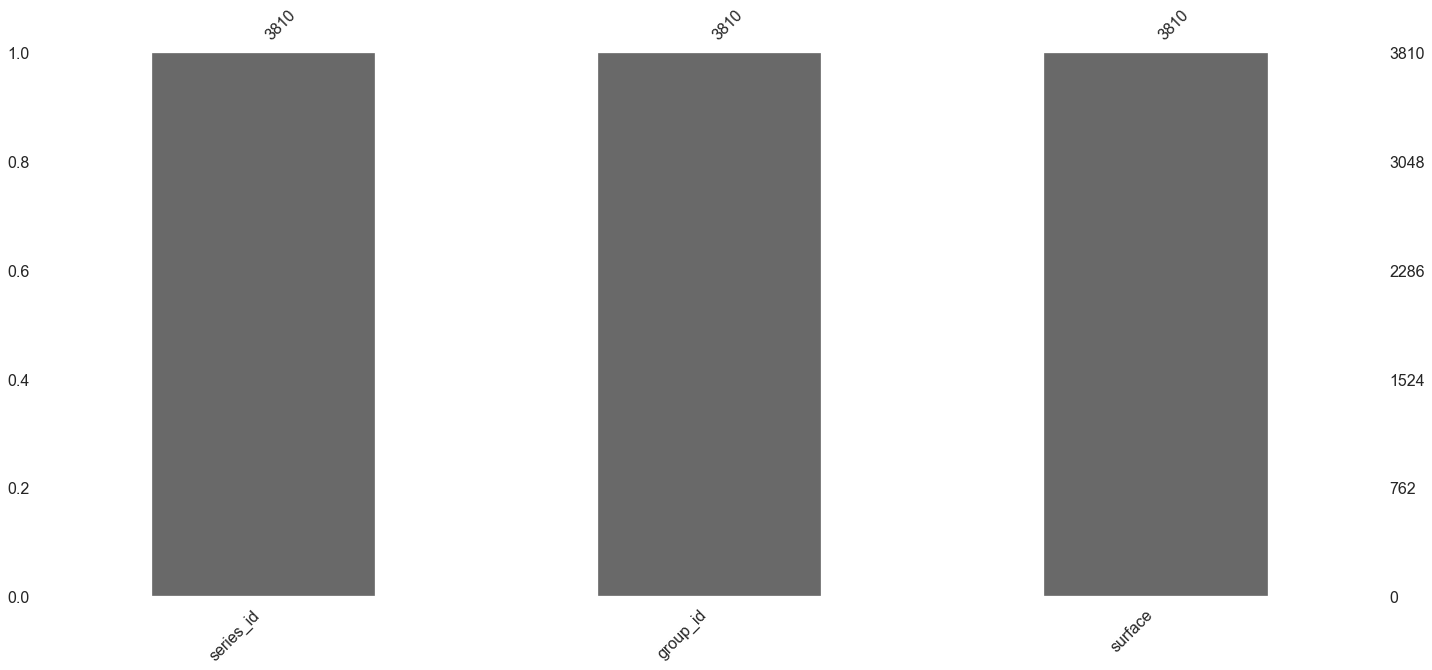

In [10]:
missingno.bar(df_y)

In [11]:
df_y.nunique()

series_id    3810
group_id       73
surface         9
dtype: int64

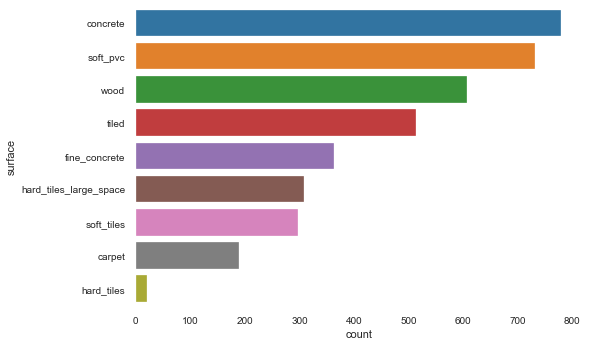

In [12]:
# df_y["surface"].value_counts().plot(kind="barh", figsize=(14,8), fontsize=12)
sns.countplot(y='surface', data=df_y, order=df_y['surface'].value_counts().index)

**Check Density plot to view distribution**

<Figure size 576x396 with 0 Axes>

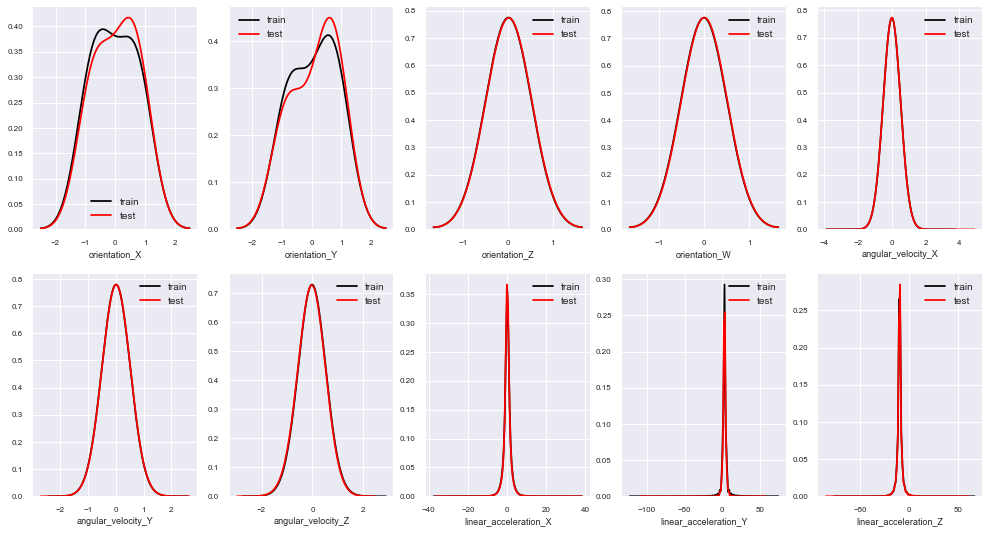

In [13]:
def plot_feature_distribution(df1, df2, label1, label2, features,a=2,b=5):
    i = 0
    sns.set_style('darkgrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(17,9))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1, color ='k')
        sns.kdeplot(df2[feature], bw=0.5,label=label2, color = 'r')
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

features = df_train.columns.values[3:]
plot_feature_distribution(df_train, df_test, 'train', 'test', features)

## Encode the target (surface values) for training and predictions:

In [14]:
# Label Encode training target value.
encoder = LabelEncoder()
y = encoder.fit_transform(df_y["surface"])
y_count = len(list(encoder.classes_))
print('Class encodings:-')
print(encoder.classes_)
print('y_count = ' + str(y_count))

Class encodings:-
['carpet' 'concrete' 'fine_concrete' 'hard_tiles' 'hard_tiles_large_space'
 'soft_pvc' 'soft_tiles' 'tiled' 'wood']
y_count = 9


In [15]:
# Map labels to encoded values
label_mapping = {i: l for i, l in enumerate(encoder.classes_)}
print("Label Mapping legend:-")
print(label_mapping)

Label Mapping legend:-
{0: 'carpet', 1: 'concrete', 2: 'fine_concrete', 3: 'hard_tiles', 4: 'hard_tiles_large_space', 5: 'soft_pvc', 6: 'soft_tiles', 7: 'tiled', 8: 'wood'}


---------------------------------------------------------------------------------------------------
We know that we have 128 different values per series_id. This has been verified before :-
487680/128 = 3810 -> df_y.shape

In [16]:
# Map train target values such that len(df_train) = len(df_y)
# Create a new column "target" in df_train
df_train["target"] = y.repeat(128)

In [17]:
# Verify changes to df_train
df_train[["series_id", "orientation_X", "orientation_Y", "orientation_Z", "target"]].head()

,series_id,orientation_X,orientation_Y,orientation_Z,target
0,0,-0.75853,-0.63435,-0.10488,2
1,0,-0.75853,-0.63434,-0.10490,2
2,0,-0.75853,-0.63435,-0.10492,2
3,0,-0.75852,-0.63436,-0.10495,2
4,0,-0.75852,-0.63435,-0.10495,2


In [27]:
# https://stackoverflow.com/questions/53033620/how-to-convert-euler-angles-to-quaternions-and-get-the-same-euler-angles-back-fr?rq=1
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

def fe(actual):

    actual['total_angular_velocity'] = (actual['angular_velocity_X'] ** 2 + actual['angular_velocity_Y'] ** 2 + actual['angular_velocity_Z'] ** 2) ** 0.5
    actual['total_linear_acceleration'] = (actual['linear_acceleration_X'] ** 2 + actual['linear_acceleration_Y'] ** 2 + actual['linear_acceleration_Z'] ** 2) ** 0.5
    
    actual['acc_vs_vel'] = actual['total_linear_acceleration'] / actual['total_angular_velocity']
    
    df = actual
    
    xyz = np.vectorize(quaternion_to_euler)(df['orientation_X'], df['orientation_Y'], df['orientation_Z'], df['orientation_W'])
    actual['euler_x'] = xyz[0]
    actual['euler_y'] = xyz[1]
    actual['euler_z'] = xyz[2]
    
    actual['total_angle'] = (actual['euler_x'] ** 2 + actual['euler_y'] ** 2 + actual['euler_z'] ** 2) ** 5
    actual['angle_vs_acc'] = actual['total_angle'] / actual['total_linear_acceleration']
    actual['angle_vs_vel'] = actual['total_angle'] / actual['total_angular_velocity']
    
    # By this point the dataframe 'actual' (could be df_train or df_test) has 9 new columns :-
    # 1. total_angular_velocity
    # 2. total_linear_acceleration
    # 3. acc_vs_vel
    # 4. euler_x
    # 5. euler_y
    # 6. euler_z
    # 7. total_angle
    # 8. angle_vs_acc
    # 9. angle_vs_vel
    
    # The 'df' DataFrame has all columns that df_train/df_test had previously and only the first 3 newly added columns.
    
    # Create a groupby object, grouped on 'series_id'
    series_groups = df.groupby("series_id")
    
    
    def fx_sum(x):
        abs_max = np.max(np.abs(x)) # in return array
        abs_min = np.min(np.abs(x)) # in return array
        
        abs_diff = np.abs(np.diff(x))
        
        abs_diff_avg = np.mean(abs_diff) # in return array
        
        abs_diff_diff = np.abs(np.diff(abs_diff))
        
        abs_diff_diff_avg = np.mean(abs_diff_diff) # in return array
        sum_diff = np.sum(np.diff(x)) # in return array
        sum_abs_diff = np.sum(abs_diff) # in return array
        count_diffs = np.count_nonzero(x) # in return array
        
        # Note: all the values that are returned within the sum_array are of type - np.float64 i.e single value!
        sum_array = np.array((abs_max, abs_min, abs_diff_avg, abs_diff_diff_avg, 
                              sum_diff, sum_abs_diff, count_diffs))
        # sum_array has 7 elements
        return sum_array
    
    # Creating a blank dataframe 'new'
    new = pd.DataFrame()
    
    for col in tqdm(actual.columns):
        if col in ['row_id', 'series_id', 'measurement_number', 'target']:
            continue

        new[col + '_mean'] = series_groups[col].mean()
        new[col + '_min'] = series_groups[col].min()
        new[col + '_max'] = series_groups[col].max()
        new[col + '_std'] = series_groups[col].std()
        new[col + '_max_to_min'] = new[col + '_max'] / new[col + '_min']

        xyz = series_groups[col].apply(fx_sum) # shape = (3810(train) or 3816(test),) - has arrays within an array, 
                                               # each subarray shape = (7,)
           
        # Converting xyz into a single array of shape (3810 or 3816, 7)
        rows = len(series_groups) # 3810(train) or 3816(test)
        col_count = len(xyz[0]) # the count returned by fx_sum(x) -> 7
        xyz_sum = np.concatenate(xyz).reshape(rows, col_count) # array shape = (3810 or 3816, 7) - single array
        
        column_names = [col+"_abs_max", col+"_abs_min", 
                        col+"_abs_diff_avg", col+"_abs_diff_diff_avg",
                        col+"_sum_diff", col+"_sum_abs_diff",
                        col+"_count_diff"
                       ]
        # Converting xyz_sum(array) to a dataframe (df_xyz_sum) of shape (3810, 7)
        df_xyz_sum = pd.DataFrame(xyz_sum, columns=column_names)
        # Making the shape of new as (3810, 7+5) i.e (3810, 12) -> 12 * 19(num_cols(23) - [row_id,series_id,measure_no.,target]) = 228
        new = pd.concat([new, df_xyz_sum], axis=1)
        
#         # Now xyz is an "arrays within an array" of shape = (3810,). Each subarray is of shape = (3, 128)
#         # where the 3 rows correspond to the outputs of fx_raw which are not single values but arrays of
#         # length 128 in this case.
#         xyz = series_groups[col].apply(fx_raw)
        
#         # convert to shape = (3, 487680), in case of df_train. So, each row corresponds to output of fx_raw
#         xyz_c = np.concatenate(xyz, axis=1)
#         # convert xyz_c to a dataframe of shape = (487680, 3)
#         df_xyz_raw = pd.DataFrame({col+"_abs_diff": xyz_c[0],
#                                    col+"_abs_diff_diff": xyz_c[1],
#                                    col+"_diff": xyz_c[2]
#                                    })
#         #this could become an infinite loop as this loop is over columns in "actual" and this adds more columns to it
#         #but this does not happen, so i guess the column set is only read at start of loop
        
#         # concatenate dataframes 'actual' and 'df_xyz_raw' into a dataframe with length 487680.
#         # Note: sub dataframes 'actual' & 'df_xyz_raw' both are of length 487680.
#         actual = pd.concat([actual, df_xyz_raw], axis=1)

        # 'actual' has now 12 additional columns (9(above operations)+3(df_xyz_raw)) and length = 487680
        # 'new' was a dataframe created within the function 'fe' and returned with a size(3810, 12),
        # where 5 columns were added and the resulting dataframe was concatenated with df_xyz_sum(with 7 columns)
        
        # Therefore, additional columns in 'actual':-
        # 1. total_angular_velocity
        # 2. total_linear_acceleration
        # 3. acc_vs_vel
        # 4. euler_x
        # 5. euler_y
        # 6. euler_z
        # 7. total_angle
        # 8. angle_vs_acc
        # 9. angle_vs_vel
        # 10. abs_diff
        # 11. abs_diff_diff
        # 12. diff
        
        # Therefore, created columns in 'new':-
        # 1. mean
        # 2. min
        # 3. max
        # 4. std
        # 5. max_to_min
        # 6. abs_max
        # 7. abs_min
        # 8. abs_diff_avg
        # 9. abs_diff_diff_avg
        # 10. sum_diff
        # 11. sum_abs_diff
        # 12. count_diff

    return new
# Note: We will use only the 'new' dataframe as df_train_sum of shape (3810, 228). Hence I have commented out 
# the 'actual' dataframe.

**Explanation for how the 'new' dataframe returned from 'fe' has a shape(3810, 228)**

Aggregation is carried out on the groupby object df_train/df_test.groupby('series_id) to get length = 3810
Initially df_train/df_test has following columns:-
1. row_id
2. series_id
3. measurement_number
4. orientation_X
5. orientation_Y
6. orientation_Z
7. orientation_W
8. angular_velocity_X
9. angular_velocity_Y
10. angular_velocity_Z
11. linear_acceleration_X
12. linear_acceleration_Y
13. linear_acceleration_Z
14. target

At the end/output of function 'fe' the dataframe df_train_sum/df_test_sum has following columns : -
1. orientation_X
2. orientation_Y
3. orientation_Z
4. orientation_W
5. angular_velocity_X
6. angular_velocity_Y
7. angular_velocity_Z
7. linear_acceleration_X
9. linear_acceleration_Y
10. linear_acceleration_Z
11. total_angular_velocity
12. total_linear_acceleration
13. acc_vs_vel
14. euler_X
15. euler_Y
16. euler_Z
17. total_angle
18. angle_vs_acc
19. angle_vs_vel

And each of these 19 columns has following columns: -
1. abs_max                 - > From fx_sum(x)
2. abs_min
3. abs_diff_avg
4. abs_diff_diff_avg
5. sum_diff
6. sum_abs_diff
7. count_diffs

8. mean
9. min
10. max
11. std
12. max_to_min

Therefore, total number of columns = 19 * 12 = 228

In [28]:
# Call the function 'fe' on df_train
df_train_sum = fe(df_train)

100%|██████████| 23/23 [00:39<00:00,  1.70s/it]


In [29]:
print(df_train_sum.shape) # (3810, 228) = 19(original no of coulumns = columns) * 12(new columns per original columns)
print(df_train.shape) # (487680, 80) = To understand how 80 columns you can print columns for df_train.
# df_train.columns

(3810, 228)
(487680, 23)


In [30]:
# Call the fe function on df_test
df_test_sum = fe(df_test)

100%|██████████| 22/22 [00:38<00:00,  1.74s/it]


## Scale and Save the Processed Data:

First pick the columns to scale:

In [36]:
feature_cols = list(df_train.columns)
feature_cols.remove('row_id')
feature_cols.remove('series_id')
feature_cols.remove('measurement_number')
feature_cols.remove('target')
len(feature_cols)

19

In [37]:
df_train.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z', 'target',
       'total_angular_velocity', 'total_linear_acceleration', 'acc_vs_vel',
       'euler_x', 'euler_y', 'euler_z', 'total_angle', 'angle_vs_acc',
       'angle_vs_vel'],
      dtype='object')

In [ ]:
# feature_cols

Before scaling anything, save the unscaled versions. This allows using this kernel as datasource for different data formats in other kernels, without repeating all the processing.

In [ ]:
# Already ran below code hence commented out.

# df_train.to_csv("features_train_raw.csv")
# df_test.to_csv("features_test_raw.csv")
# df_train_sum.to_csv("features_train_sum.csv")
# df_test_sum.to_csv("features_test_sum.csv")

In [ ]:
#function to scale two dataframes. fit and transform the first (e.g., training set), 
#and use the same scaler to transform the seconds one (e.g., test set)
def scale_df(df1, df2, feature_cols):
    """Function to standard scale features for train(df1) and test set(df2)"""
    
    # Instantiate the standard scaler
    scaler = StandardScaler()
    
    # Create scaled features
    scaled_features = scaler.fit_transform(df1[feature_cols])
    
    # Set df1 features to scaled features
    df1[feature_cols] = scaled_features
    
    # Repeat steps for test set
    scaled_test_features = scaler.transform(df2[feature_cols])
    df2[feature_cols] = scaled_test_features
    
    # Return standard scaled train and test dataframes
    return df1, df2

Scale the "raw" dataframes first.

Note: 'raw' refers to the dataframe without any grouping based on series_id i.e length of dataframe = 487680.
        raw dataframes here are df_train and df_test obtained after calling fe function on df_train and df_test               respectively.

In [ ]:
# df_train, df_test = scale_df(df_train, df_test, feature_cols)

In [ ]:
# df_train.describe()

Now scale the "summary" dataframe similarly.

In [ ]:
#appears we stripped the columns in this summary dataframe already(when we called the 'fe' function earlier)
#, so we can just use those columns as is
df_train_sum, df_test_sum = scale_df(df_train_sum, df_test_sum, df_train_sum.columns)

And save the scaled in the same way as the un-scaled before:

In [ ]:
# Has already been run hence commented out

# df_train.to_csv("features_train_scaled_raw.csv")
# df_test.to_csv("features_test_scaled_raw.csv")
# df_train_sum.to_csv("features_train_scaled_sum.csv")
# df_test_sum.to_csv("features_test_scaled_sum.csv")

# Cross Validation:

In [ ]:
# def get_score(model, x_train, x_test, y_train, y_test):
    
#     model.fit(x_train, y_train)
#     predictions = model.predict(x_test)
# #     return accuracy_score(y_test, predictions) Use this statment or below statement. You will get the same result!
#     return model.score(x_test, y_test)

## Remove Orientation data - Red Herring

In [ ]:
df_train_sum = df_train_sum[list(df_train_sum.columns)[48:]]
df_test_sum = df_test_sum[list(df_test_sum.columns)[48:]]

In [ ]:
df_train_sum.shape

In [ ]:
# model_final = Sequential()
#     model_final.add(Dense(180, activation='relu', input_shape=(228,)))
#     model_final.add(Dense(100, activation='relu'))
#     # model_final.add(Dropout(0.2))
#     model_final.add(Dense(75, activation='relu'))
#     # model_final.add(Dropout(0.2))
#     model_final.add(Dense(50, activation='relu'))
#     # model_final.add(Dropout(0.2))
#     model_final.add(Dense(30, activation='relu'))
#     # model_final.add(Dropout(0.2))
#     model_final.add(Dense(30, activation='relu'))
#     # model_final.add(Dropout(0.2))
#     model_final.add(Dense(15, activation='relu'))
#     # model_final.add(Dropout(0.2))
#     model_final.add(Dense(9, activation='softmax'))
#     # compile the keras model
#     model_final.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## Cross Validation

In [ ]:
# def get_score(model, x_train, x_test, y_train, y_test):
    
#     model.fit(x_train, y_train)
#     return model.score(x_test, y_test)

# skf = StratifiedKFold(n_splits=10)

# scores_rf = []
# scores_knn = []
# scores_xgb = []
# scores_fnn = []

# for train_idx, test_idx in skf.split(df_train_sum, y):
    
#     train, train_labels = df_train_sum.iloc[train_idx], y[train_idx]
#     test, test_labels = df_train_sum.iloc[test_idx], y[test_idx]
    
#     # Train and get scores for classifiers.
#     score_rf = get_score(RandomForestClassifier(n_estimators=50), train, test, train_labels, test_labels)
# #     score_knn = get_score(KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean'), train, test, train_labels, test_labels)
# #     score_xgb = get_score(XGBClassifier(min_samples_split=2, min_samples_leaf=1,learning_rate=0.6,n_estimators=150), train, test, train_labels, test_labels)
    
# #     # Store scores in separate lists
# #     scores_xgb.append(score_xgb)
#     scores_rf.append(score_rf)
# #     scores_knn.append(score_knn)
    
    
#     # Creating a full connected neural net
    
#     # define the keras model
# #     model_final = Sequential()
# #     model_final.add(Dense(180, activation='relu', input_shape=(180,)))
# # #     model_final.add(Dense(100, activation='relu'))
# # #     model_final.add(Dropout(0.2))
# #     model_final.add(Dense(120, activation='relu'))
# # #     model_final.add(Dropout(0.2))
# #     model_final.add(Dense(70, activation='relu'))
# # #     model_final.add(Dropout(0.2))
# #     model_final.add(Dense(30, activation='relu'))
# #     # model_final.add(Dropout(0.2))
# # #     model_final.add(Dense(30, activation='relu'))
# #     # model_final.add(Dropout(0.2))
# # #     model_final.add(Dense(15, activation='relu'))
# #     # model_final.add(Dropout(0.2))
# #     model_final.add(Dense(9, activation='softmax'))
# #     # compile the keras model
# #     model_final.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
# #     # fit the keras model on the dataset
# #     ytrain_binary = to_categorical(train_labels)
# #     model_final.fit(train, ytrain_binary, epochs=20, shuffle=True, class_weight="balanced")
# #     # make class predictions with the model
# #     binary_test = to_categorical(test_labels)
# #     # Get score/accuracy
# #     score_loss, score_accuracy = model_final.evaluate(test, binary_test)
    
#     # Append score
# #     scores_fnn.append(score_accuracy)
    
    
# # # Display scores
# print("Performance of classifiers : -")
# print("Random forest classifier mean accuracy = " + str(np.mean(scores_rf)*100) + "%")
# # print("kNearestNeighbors classifier mean accuracy = " + str(np.mean(scores_knn)*100) + "%")
# # print("XGBoost classifier mean accuracy = " + str(np.mean(scores_xgb)*100) + "%")
# # print("Fully connected neural net classifier mean accuracy = " + str(np.mean(scores_fnn)*100) + "%")

## Get predicitons on test set for Submission!

In [ ]:
df_train_sum.shape

In [ ]:
df_test_sum.shape

In [ ]:
# 'rf' -> Random Forest Classifier
# 'knn' -> K Nearest Neighbors Classifier
# 'xgb' -> XG Boost Classifier
# 'fnn' -> Fully connected neural network classifier

classifier = 'knn' # Valid values = 'rf', 'knn', 'xgb', 'fnn' 

if classifier == 'rf':
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(df_train_sum, y)
    predictions = rf.predict(df_test_sum)
    
elif classifier == 'knn':
    knn = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='euclidean') # Try metric='euclidean',
                                                                  # n_neighbors between (1,21)
                                                                  # n_classes = 9(odd) so k->even!
    knn.fit(df_train_sum, y)
    predictions = knn.predict(df_test_sum)
    
elif classifier == 'xgb':
    xgb = XGBClassifier(min_samples_split=2, min_samples_leaf=1,learning_rate=0.6,n_estimators=150)
    xgb.fit(df_train_sum, y)
    predictions = xgb.predict(df_test_sum)
    
elif classifier == 'fnn':
    # Private LB score = 0.6224, Public LB score = 0.5442
    model_final = Sequential()
    model_final.add(Dense(180, activation='relu', input_shape=(180,)))
#     model_final.add(Dense(100, activation='relu'))
#     model_final.add(Dropout(0.2))
    model_final.add(Dense(120, activation='relu'))
#     model_final.add(Dropout(0.2))
    model_final.add(Dense(70, activation='relu'))
#     model_final.add(Dropout(0.2))
    model_final.add(Dense(30, activation='relu'))
    # model_final.add(Dropout(0.2))
#     model_final.add(Dense(30, activation='relu'))
    # model_final.add(Dropout(0.2))
#     model_final.add(Dense(15, activation='relu'))
    # model_final.add(Dropout(0.2))
    model_final.add(Dense(9, activation='softmax'))
    # compile the keras model
    model_final.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    # fit the keras model on the dataset
    ytrain_binary = to_categorical(y)
    model_final.fit(df_train_sum, ytrain_binary, epochs=20, shuffle=True, class_weight="balanced")
    # make class predictions with the model

    predictions = model_final.predict(df_test_sum)
    
else:
    print('Invalid classifier name!')
    
ss = pd.read_csv('sample_submission.csv')
if classifier == 'fnn':
    predictions = encoder.inverse_transform(np.argmax(predictions, axis=1))
else:
    predictions = encoder.inverse_transform(predictions)
ss['surface'] = predictions
print(predictions)    
ss.to_csv('knn_top', index=False)



In [ ]:
# Private LB score = 0.6361, Public LB score = 0.5782
 
# model_final = Sequential()
# model_final.add(Dense(100, activation='relu',input_shape=(228,)))
# model_final.add(Dense(50, activation='relu'))
# #     modelnn.add(Dropout(0.2))
# model_final.add(Dense(30, activation='relu'))
# #     modelnn.add(Dropout(0.2))
# model_final.add(Dense(20, activation='relu'))
# #     modelnn.add(Dropout(0.2))
# model_final.add(Dense(20, activation='relu'))
# #     modelnn.add(Dropout(0.2))
# model_final.add(Dense(9, activation='softmax'))
# # compile the keras model

